# Diff the lightcurve to remove the linear trend in the lightcurve
## offset is out of scope

In [1]:
import math
import torch
import gpytorch
%load_ext autoreload
%autoreload 2

import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from astropy.timeseries import LombScargle
import pandas as pd
pd.set_option('precision', 0)
pd.set_option('display.float_format', lambda x: '%.16f' % x)

In [2]:
# Make the notebook use the whole screen width
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
def normalize(series):
   median = np.median(series)
   series = (series / median) - 1
   std = series.std()
   return median, std, series

In [4]:
def plot_data(X, Y, X2=None, Y2=None):
    # Setup our figure environment
    plt.figure(figsize=(35, 5))

    # Plot observations
    plt.plot(X, Y, ".", mew=1, linewidth=1, mec="black")
    if X2 is not None:
        plt.plot(X2, Y2, ".", mew=1, linewidth=1, mec="red")

    # Annotate plot
    plt.xlabel("x"), plt.ylabel("f")
    plt.legend(labels=["sample points"])
    
def plot_lomb_scargle_periodogram(x, y, min_freq, max_freq, frequencies=None):
    if frequencies is not None:
        power = LombScargle(x, y).power(frequencies)
    else:
        frequencies, power = LombScargle(x, y).autopower(minimum_frequency=min_freq, maximum_frequency=max_freq)
    plt.figure(figsize=(35, 8))
    plt.plot(frequencies, power)
    plt.xlabel("frequency"), plt.ylabel("power")
    return frequencies, power

In [5]:
df = pd.read_csv("../../data/sim_noisy_pulse_eb.lc",sep=' ', header = None, names=['Time', 'Lc'], index_col=False, float_precision='round_trip')
X2_full, Y2_full = df['Time'].tolist(), df['Lc'].tolist()
X2_full, Y2_full = np.array(X2_full), np.array(Y2_full)

In [6]:
# Nr of days
X2_full[-1] - X2_full[0]

1470.4625075166114

In [9]:
# Nr of samples
nr_of_samples = len(X2_full)
nr_of_samples

51972

In [13]:
# Sample period in hours (~29 minutes cadence)
(X2_full[1] - X2_full[0]) * 24

0.49042198061943054

In [12]:
exp_nr_of_samples = (X2_full[-1] - X2_full[0]) / (X2_full[1] - X2_full[0])
exp_nr_of_samples

71960.68197396868

In [45]:
(nr_of_samples / exp_nr_of_samples) * 100

72.22277301207421

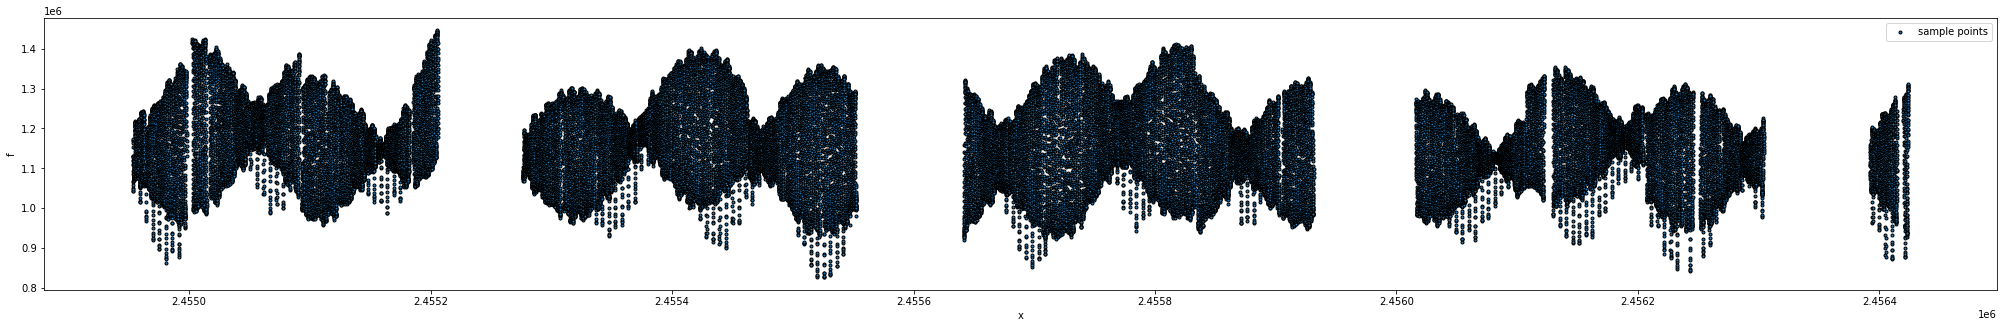

In [14]:
plot_data(X2_full, Y2_full)

In [30]:
Y2_full_diff = np.log(np.diff(Y2_full, n=1, prepend=0.0))
Y2_full_diff[0] = 0.0

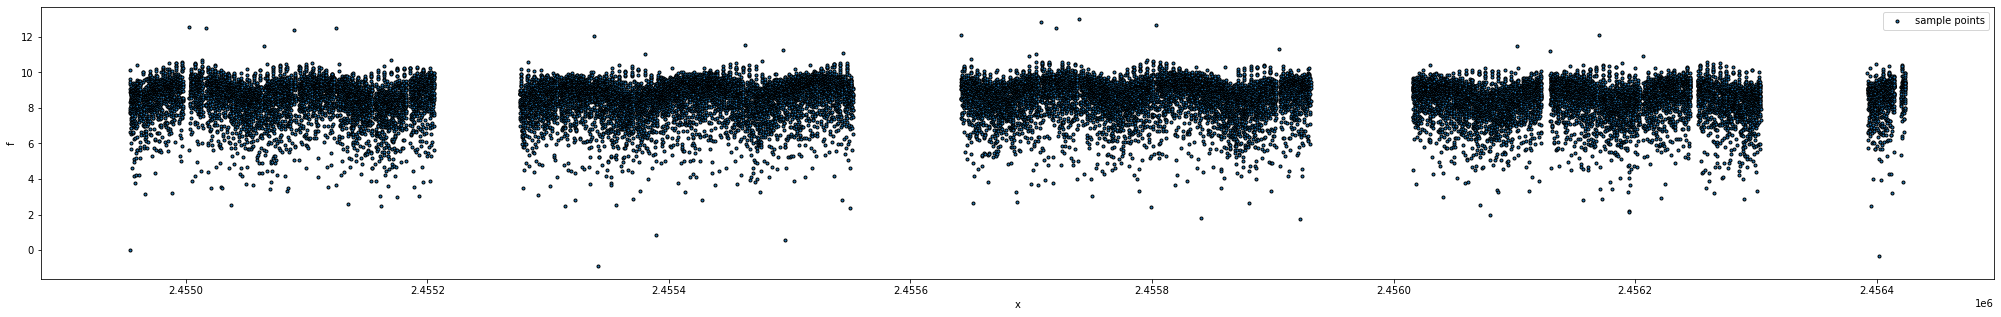

In [31]:
plot_data(X2_full, Y2_full_diff)